# Import libraries

In [250]:
import scipy.io
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# Opening mat files

In [109]:
mat1 = scipy.io.loadmat('2010rainfall')
mat2 = scipy.io.loadmat('2011rainfall')

In [110]:
mat1['XR1'].shape

(357, 122)

In [111]:
mat1['ZR1'].shape

(1, 122)

In [112]:
mat2['XR'].shape

(357, 122)

In [113]:
mat2['ZR'].shape

(1, 122)

In [114]:
mat1['XR1'][0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.32462540e+01, 6.73252182e+01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.96031314e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.55051303e+00, 8.84492302e+00,
       3.76718402e-01, 6.15205526e+00, 7.02434683e+00, 1.02122145e+01,
       2.48539257e+00, 1.99840024e-01, 0.00000000e+00, 0.00000000e+00,
       2.16200948e-01, 1.28968132e+00, 0.00000000e+00, 5.81816971e-01,
       7.24621677e+00, 3.18231255e-01, 2.67654270e-01, 0.00000000e+00,
       6.85993271e+01, 1.68807850e+01, 3.09660107e-01, 1.47091122e+01,
      

In [115]:
mat1['ZR1']

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

# Making training set for 3 locations

In [116]:
y1=mat1['XR1'][41]#mumbai
y2=mat1['XR1'][157]#delhi
y3=mat1['XR1'][298]#kharagpur

In [117]:
x_train1=np.concatenate((mat1['XR1'][:41],mat1['XR1'][42:]))# removing the current location
x_train2=np.concatenate((mat1['XR1'][:157],mat1['XR1'][158:]))# removing the current location
x_train3=np.concatenate((mat1['XR1'][:298],mat1['XR1'][299:]))# removing the current location

In [118]:
prev_day1=np.expand_dims(np.concatenate(([0],mat1['XR1'][41][:121])),axis=0)#adding t-1 feature for mumbai
prev_to_prev_day1=np.expand_dims(np.concatenate(([0,0],mat1['XR1'][41][:120])),axis=0)#adding t-2 feature for mumbai

In [119]:
prev_day2=np.expand_dims(np.concatenate(([0],mat1['XR1'][157][:121])),axis=0)#adding t-1 feature for delhi
prev_to_prev_day2=np.expand_dims(np.concatenate(([0,0],mat1['XR1'][157][:120])),axis=0)#adding t-2 feature for delhi

In [120]:
prev_day3=np.expand_dims(np.concatenate(([0],mat1['XR1'][298][:121])),axis=0)#adding t-1 feature for kharagpur
prev_to_prev_day3=np.expand_dims(np.concatenate(([0,0],mat1['XR1'][298][:120])),axis=0)#adding t-2 feature for kharagpur

In [121]:
x_train1=np.concatenate((x_train1,prev_day1,prev_to_prev_day1))# adding previous day feature
x_train2=np.concatenate((x_train2,prev_day2,prev_to_prev_day2))# adding previous day feature
x_train3=np.concatenate((x_train3,prev_day3,prev_to_prev_day3))# adding previous day feature

# Applying linear regression on training sets

In [122]:
reg1 = LinearRegression().fit(x_train1.T,y1)
reg2 = LinearRegression().fit(x_train2.T,y2)
reg3 = LinearRegression().fit(x_train3.T,y3)

# Making test set

In [123]:
y_tr1=mat2['XR'][41]#mumbai
y_tr2=mat2['XR'][157]#delhi
y_tr3=mat2['XR'][298]#kharagpur

In [124]:
x_test1=np.concatenate((mat2['XR'][:41],mat2['XR'][42:]))# removing the current location
x_test2=np.concatenate((mat2['XR'][:157],mat2['XR'][158:]))# removing the current location
x_test3=np.concatenate((mat2['XR'][:298],mat2['XR'][299:]))# removing the current location

In [125]:
prev_day1=np.expand_dims(np.concatenate(([0],mat2['XR'][41][:121])),axis=0)#adding t-1 feature for mumbai
prev_to_prev_day1=np.expand_dims(np.concatenate(([0,0],mat2['XR'][41][:120])),axis=0)#adding t-2 feature for mumbai

In [126]:
prev_day2=np.expand_dims(np.concatenate(([0],mat2['XR'][157][:121])),axis=0)#adding t-1 feature for delhi
prev_to_prev_day2=np.expand_dims(np.concatenate(([0,0],mat2['XR'][157][:120])),axis=0)#adding t-2 feature for delhi

In [127]:
prev_day3=np.expand_dims(np.concatenate(([0],mat2['XR'][298][:121])),axis=0)#adding t-1 feature for kharagpur
prev_to_prev_day3=np.expand_dims(np.concatenate(([0,0],mat2['XR'][298][:120])),axis=0)#adding t-2 feature for kharagpur

In [128]:
x_test1=np.concatenate((x_test1,prev_day1,prev_to_prev_day1))# adding previous day feature
x_test2=np.concatenate((x_test2,prev_day2,prev_to_prev_day2))# adding previous day feature
x_test3=np.concatenate((x_test3,prev_day3,prev_to_prev_day3))# adding previous day feature


# Predicting

In [134]:
y_pred1=reg1.predict(x_test1.T)
y_pred2=reg2.predict(x_test2.T)
y_pred3=reg3.predict(x_test3.T)

In [135]:
mean_squared_error(y_tr1, y_pred1)#rmse for mumbai

1333.505738746679

In [136]:
mean_squared_error(y_tr2, y_pred2)#rmse for delhi

480.5445950680283

In [137]:
mean_squared_error(y_tr3, y_pred3)#rmse for kharagpur

509.46221160536845

In [139]:
mean_absolute_error(y_tr1, y_pred1)#mean_absolute_error for mumbai

27.14649056953846

In [140]:
mean_absolute_error(y_tr2, y_pred2)#mean_absolute_error for delhi

16.256656160190076

In [141]:
mean_absolute_error(y_tr3, y_pred3)#mean_absolute_error for kharagpur

16.787642376907677

# Using lasso regression

In [171]:
clf1 = linear_model.Lasso(alpha=31.8)
clf1.fit(x_train1.T,y1)


Lasso(alpha=31.8, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [172]:
clf1.coef_[clf1.coef_>0]

array([5.75048159e-01, 4.25492422e-01, 1.40033732e-04, 9.21100974e-04,
       1.95918776e-02])

In [173]:
np.where(clf1.coef_>0)

(array([ 25,  40,  41,  57, 315], dtype=int64),)

### Top 5 predictor for mumbai are locations 25,40,41,57,315

In [181]:
clf2 = linear_model.Lasso(alpha=50)
clf2.fit(x_train2.T,y2)

Lasso(alpha=50, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [182]:
clf2.coef_[clf2.coef_>0]

array([0.04716953, 0.04612489, 0.11066653, 0.03960022, 0.08329245])

In [183]:
np.where(clf2.coef_>0)

(array([ 25, 132, 158, 160, 214], dtype=int64),)

### Top 5 predictor for delhi are locations 25,132,158,160,214

In [187]:
clf3 = linear_model.Lasso(alpha=60)
clf3.fit(x_train3.T,y3)

Lasso(alpha=60, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [188]:
clf3.coef_[clf3.coef_>0]

array([0.01950184, 0.0156318 , 0.00995799, 0.10616943, 0.19220411])

In [189]:
np.where(clf3.coef_>0)

(array([161, 230, 232, 247, 303], dtype=int64),)

### Top 5 predictor for kharagpur are locations 161,230,232,247,303

# Decision Tree

In [280]:
clf = DecisionTreeClassifier(random_state=0,criterion='entropy',max_depth=4)

In [281]:
clf.fit(mat1['XR1'].T, mat1['ZR1'].T)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [282]:
y_pred=clf.predict(mat2['XR'].T)

In [283]:
accuracy_score(mat2['ZR'].T, y_pred)

0.7377049180327869

### Accuracy of decision tree is 73.7%

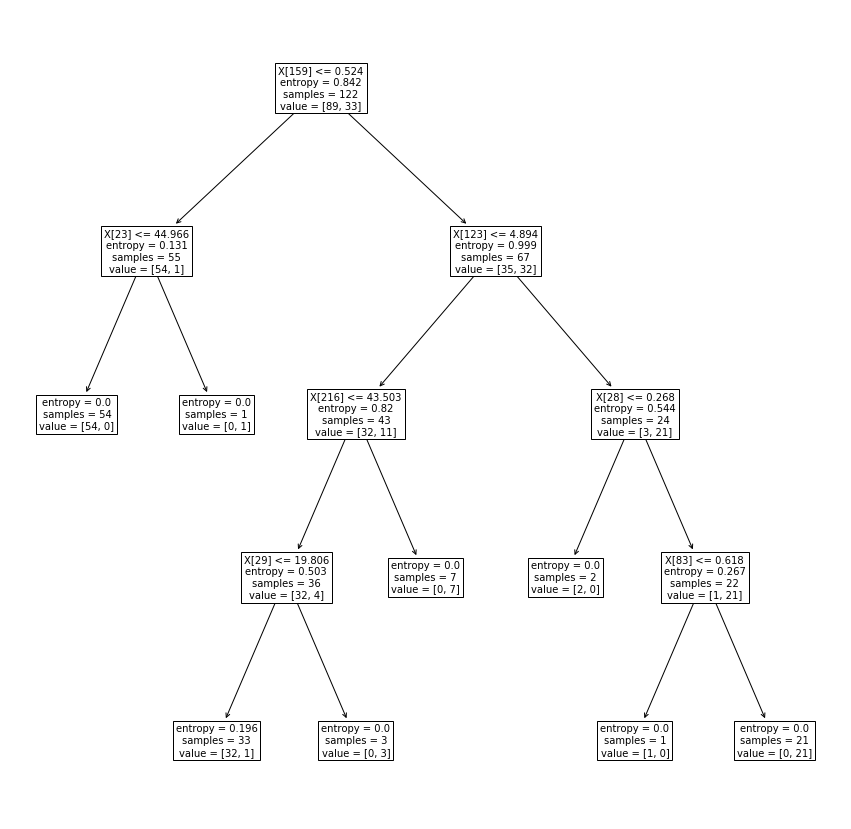

In [284]:
fig, ax = plt.subplots(figsize=(15, 15))
tree.plot_tree(clf,fontsize=10)
plt.show()

In [285]:
importances = clf.feature_importances_

In [286]:
importances[importances>0]

array([0.07489493, 0.07454032, 0.12102549, 0.06095607, 0.19299908,
       0.29737062, 0.1782135 ])

In [287]:
np.where(importances>0)

(array([ 23,  28,  29,  83, 123, 159, 216], dtype=int64),)

### 10 most discriminative locations are 23,  28,  29,  83, 123, 159,  216